# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
from dqn_agent import DQNAgent
from double_dqn_agent import DoubleDQNAgent

In [2]:
import torch
from collections import namedtuple, deque
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
env = UnityEnvironment(file_name="../Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]
action_size = brain.vector_action_space_size
state = env_info.vector_observations[0]
state_size = len(state)

In [6]:
def train_agent(filename, num_episodes = 2000, max_iter = 1000, epsilon_start = 1.0, epsilon_decay = 0.995, epsilon_min = 0.01):
    scores = []
    scores_window = deque(maxlen=100)
    epsilon = epsilon_start
    for episode in range(1, num_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]  # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0                                          # initialize the score
        for i in range(max_iter):
            action = agent.act(state, epsilon)             # select an action
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state, action, reward, next_state, done)
            score += reward                                # update the score
            state = next_state                             # roll over the state to next time step
            if done:                                       # exit loop if episode finished
                break
        epsilon = max(epsilon_decay*epsilon, epsilon_min)
        scores_window.append(score)
        scores.append(score)
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(episode, np.mean(scores_window)), end="")
        if episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(episode, np.mean(scores_window)))
        
        """
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), filename)
            break
        """  
    return scores

In [7]:
agent = DoubleDQNAgent(state_size=state_size, action_size=action_size, seed=0, hidden_layers=[64, 64])
scores = train_agent('../Trained_Weights/doubledqn_chkpoint.pth')

Episode 100	Average Score: 1.16
Episode 200	Average Score: 4.24
Episode 300	Average Score: 7.49
Episode 400	Average Score: 9.91
Episode 500	Average Score: 12.04
Episode 600	Average Score: 13.00
Episode 700	Average Score: 13.75
Episode 800	Average Score: 14.03
Episode 900	Average Score: 14.46
Episode 1000	Average Score: 15.30
Episode 1100	Average Score: 15.61
Episode 1200	Average Score: 16.46
Episode 1300	Average Score: 15.93
Episode 1400	Average Score: 15.95
Episode 1500	Average Score: 14.54
Episode 1600	Average Score: 14.86
Episode 1700	Average Score: 15.43
Episode 1800	Average Score: 15.19
Episode 1900	Average Score: 15.36
Episode 2000	Average Score: 15.30


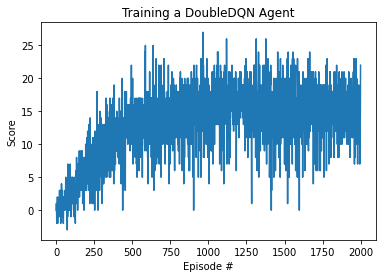

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('Training a DoubleDQN Agent')
plt.savefig('../Charts/doubledqn.png', transparent=True)

In [18]:
len(scores)

2000

In [9]:
env.close()